<a href="https://colab.research.google.com/github/geoskimoto/SNOTEL_DoubleMassAnalysis/blob/main/SiteCharacterization12_31_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import scipy.stats as stats
import statsmodels.api as sm
from functools import reduce

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
cd /content/gdrive/My Drive/Projects/Work/SiteComparisons/SWE

/content/gdrive/My Drive/Projects/Work/SiteComparisons/SWE


In [7]:
ls

OR_SWE_diff_ways_to_extract_text.xlsx  OR_SWE.xlsx  WA_SWE.xlsx


In [8]:
# OR_Sites = pd.read_excel('OR SWE.xlsx')
# OR_Sites.sample(5)

## Import SWE Data from OR and WA Sites

In [9]:
WA_Sites = pd.read_excel('WA_SWE.xlsx')
# pd.to_datetime(WA_Sites['Date'])
WA_Sites.set_index('Date',inplace=True)
WA_Sites.sample(5)

,Alpine Meadows (908),Beaver Pass (990),Blewett Pass (352),Brown Top (1080),Buckinghorse (1107),Bumping Ridge (375),Bunchgrass Mdw (376),Burnt Mountain (942),Calamity (1109),Cayuse Pass (1085),Corral Pass (418),Cougar Mountain (420),Dungeness (943),Easy Pass (998),Elbow Lake (910),Fish Lake (478),Gold Axe Camp (1159),Gold Mountain (1256),Green Lake (502),Grouse Camp (507),Harts Pass (515),Huckleberry Creek (928),Indian Rock (1129),June Lake (553),Lone Pine (591),Lost Horse (599),Lyman Lake (606),Lynn Lake (1069),Marten Ridge (999),Meadows Pass (897),MF Nooksack (1011),Morse Lake (642),Moses Mtn (644),Mount Crag (648),Mount Gardner (898),Mowich (941),Mt. Tebo (1126),Muckamuck (1259),Olallie Meadows (672),Paradise (679),Park Creek Ridge (681),Pepper Creek (1104),Pigtail Peak (692),Pinto Rock (1263),Pope Ridge (699),Potato Hill (702),Quartz Peak (707),Rainy Pass (711)),Rex River (911),Salmon Meadows (728)),Sasse Ridge (734),Satus Pass (1231),Sawmill Ridge (1068),Sentinel Butte (1043),Sheep Canyon (748),Skate Creek (1257),Skookum Creek (912),Sourdough Gulch (985),Spencer Meadow (776),Spirit Lake (777),Spruce Springs (984),Stampede Pass (788),Stevens Pass (791),Surprise Lakes (804),Swamp Creek (975),Swift Creek (1012),Thunder Basin (817),Tinkham Creek (899),Touchet (824),Trinity (1171),Trough (832),Upper Wheeler (841),Waterhole (974),Wells Creek (909),White Pass E.S. (863)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-03-22,78.5,41.5,18.6,NaN,NaN,34.1,28.9,39.3,NaN,66.6,35.9,37.9,14.8,NaN,57.2,36.4,NaN,NaN,26.7,19.3,37.7,3.2,NaN,80.7,59.9,18.8,52.2,54.2,74.2,53.2,59.3,57.9,11.0,33.6,35.7,5.3,NaN,NaN,75.9,87.5,52.3,22.8,61.3,NaN,17.2,42.5,29.4,33.5,74.5,8.7,38.3,NaN,57.7,7.0,66.3,NaN,68.6,9.6,55.0,25.3,26.4,58.7,42.0,62.2,22.0,88.4,35.2,45.9,43.2,NaN,4.8,12.8,47.5,39.3,28.0
1999-03-02,66.8,NaN,18.2,NaN,NaN,50.0,41.4,NaN,NaN,NaN,43.2,25.8,24.8,NaN,61.8,51.6,NaN,NaN,35.2,30.7,61.4,5.2,NaN,66.7,74.5,32.0,78.0,NaN,NaN,35.0,NaN,79.6,32.4,65.9,26.6,5.8,NaN,NaN,77.1,84.7,66.6,NaN,68.1,NaN,27.9,44.4,30.5,53.7,41.6,14.5,53.1,NaN,NaN,NaN,69.0,NaN,41.9,NaN,62.3,24.7,NaN,55.6,54.3,71.4,NaN,NaN,42.0,29.9,48.9,NaN,13.6,18.8,NaN,44.0,29.9
2008-08-07,6.9,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,7.7,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
1986-03-18,NaN,NaN,15.2,NaN,NaN,22.8,18.6,NaN,NaN,NaN,30.5,9.0,NaN,NaN,NaN,23.1,NaN,NaN,16.1,18.3,39.5,NaN,NaN,12.1,17.5,NaN,44.5,NaN,NaN,NaN,NaN,41.4,NaN,NaN,NaN,NaN,NaN,NaN,35.2,47.5,36.8,NaN,34.8,NaN,16.3,22.5,NaN,31.8,NaN,8.7,24.0,NaN,NaN,NaN,5.4,NaN,NaN,NaN,19.1,0.0,NaN,33.2,33.7,36.8,NaN,NaN,NaN,NaN,26.6,NaN,5.4,16.6,NaN,NaN,19.1
2005-08-07,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [10]:
OR_Sites = pd.read_excel('OR_SWE.xlsx')
# pd.to_datetime(OR_Sites['Date'])
OR_Sites.set_index('Date',inplace=True)
OR_Sites.sample(5)

,Aneroid Lake #2 (302),Annie Springs (1000),Arbuckle Mtn (304),Bear Grass (1166),Beaver Reservoir (331),Big Red Mountain,Bigelow Camp (343),Billie Creek Divide,Blazed Alder (351),Blue Mountain Spring,Bourne (361) Snow,Bowman Springs (362),Cascade Summit (388),Chemult Alternate (395),Clackamas Lake (398),Clear Lake (401),Cold Springs Camp,County Line (422),Crazyman Flat (1010),Daly Lake (434),Derr. (440) Snow,Diamond Lake (442),Eilertson Meadows (464),Emigrant Springs (470),Fish Creek (477),Fish Lk. (479),Fourmile Lake (483),Gerber Reservoir (945),Gold Center (494),Greenpoint (504) Snow,High Ridge (523),Hogg Pass (526),Holland Meadows (529),Howard Prairie (1158),Irish Taylor (545),Jump Off Joe (552),King Mountain (558),Lake Creek R.S. (563),Little Meadows (584),Lucky Strike (605),...,Marion Forks (614),Mckenzie (619),Milk Shakes (1079),Miller Woods (1084),Moss Springs (647),Mt Hood Test Site (651),Mt. Howard (653),Mud Ridge (655),New Crescent Lake (660),North Fork (666),Ochoco Meadows (671),Peavine Ridge (687),Quartz Mountain (706),Railroad Overpass (710),Red Hill (712),Roaring River (719),Rock Springs (721),Saddle Mountain (726),Salt Creek Falls (729),Santiam Jct. (733),Schneider Meadows (736),Seine Creek (743),Sevenmile Marsh (745),Silver Creek (756),Silvies (759) Snow,Smith Ridge (1167),Snow Mountain (767),South Fork Bull Run (925),Starr Ridge (789),Strawberry (794),Summer Rim (800),Summit Lake (801),Sun Pass (1078),Swan Lake Mtn (1077),Taylor Butte (810),Taylor Green (812),Three Creeks Meadow (815),Tipton (821),Toketee Airstrip (1044),Wolf Creek (873)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-05-10,27.2,46.0,5.7,NaN,0.0,33.3,1.0,13.6,18.9,6.3,0.6,0.0,17.4,0.0,0.0,0.0,20.9,0.0,9.3,0.0,0.0,0.0,0.0,0.0,31.0,0.2,21.1,0.0,0.0,0.0,8.8,25.0,5.3,NaN,32.2,0.0,0.0,0.0,17.2,0.0,...,0.0,35.3,NaN,NaN,20.0,52.5,24.4,11.3,0.0,3.0,0.0,0.0,0.0,0.0,27.7,11.8,0.0,0.0,0.4,0.0,16.6,0.0,24.8,0.0,7.1,NaN,7.5,0.0,0.0,0.0,19.1,35.4,NaN,NaN,0.0,7.3,4.2,0.0,NaN,0.0
1996-10-07,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0
1998-04-02,24.1,NaN,22.2,NaN,15.6,34.8,18.0,16.7,25.1,15.8,13.8,5.8,25.0,5.1,9.5,15.8,28.6,0.0,NaN,3.5,15.8,11.7,7.0,0.0,35.6,6.0,28.5,NaN,4.7,16.0,17.4,35.1,14.7,NaN,29.6,1.0,1.2,11.6,14.8,6.6,...,0.0,30.2,NaN,NaN,20.5,55.0,14.8,20.5,11.6,20.6,10.6,8.8,0.0,0.0,50.0,22.6,3.3,0.3,11.6,5.0,26.0,0.0,34.2,8.8,17.8,NaN,16.3,0.0,0.0,5.8,23.2,35.3,NaN,NaN,3.6,20.3,17.8,11.5,NaN,19.5
1985-10-18,0.9,NaN,0.6,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0
2001-05-26,6.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,0.0,24.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,11.4,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0


## Merge SWE sites into single dataframe in accordance to date

In [11]:
ORWA_Sites = pd.merge(OR_Sites,WA_Sites,left_index=True,right_index=True)
ORWA_Sites.sample(5)

,Aneroid Lake #2 (302),Annie Springs (1000),Arbuckle Mtn (304),Bear Grass (1166),Beaver Reservoir (331),Big Red Mountain,Bigelow Camp (343),Billie Creek Divide,Blazed Alder (351),Blue Mountain Spring,Bourne (361) Snow,Bowman Springs (362),Cascade Summit (388),Chemult Alternate (395),Clackamas Lake (398),Clear Lake (401),Cold Springs Camp,County Line (422),Crazyman Flat (1010),Daly Lake (434),Derr. (440) Snow,Diamond Lake (442),Eilertson Meadows (464),Emigrant Springs (470),Fish Creek (477),Fish Lk. (479),Fourmile Lake (483),Gerber Reservoir (945),Gold Center (494),Greenpoint (504) Snow,High Ridge (523),Hogg Pass (526),Holland Meadows (529),Howard Prairie (1158),Irish Taylor (545),Jump Off Joe (552),King Mountain (558),Lake Creek R.S. (563),Little Meadows (584),Lucky Strike (605),...,Mowich (941),Mt. Tebo (1126),Muckamuck (1259),Olallie Meadows (672),Paradise (679),Park Creek Ridge (681),Pepper Creek (1104),Pigtail Peak (692),Pinto Rock (1263),Pope Ridge (699),Potato Hill (702),Quartz Peak (707),Rainy Pass (711)),Rex River (911),Salmon Meadows (728)),Sasse Ridge (734),Satus Pass (1231),Sawmill Ridge (1068),Sentinel Butte (1043),Sheep Canyon (748),Skate Creek (1257),Skookum Creek (912),Sourdough Gulch (985),Spencer Meadow (776),Spirit Lake (777),Spruce Springs (984),Stampede Pass (788),Stevens Pass (791),Surprise Lakes (804),Swamp Creek (975),Swift Creek (1012),Thunder Basin (817),Tinkham Creek (899),Touchet (824),Trinity (1171),Trough (832),Upper Wheeler (841),Waterhole (974),Wells Creek (909),White Pass E.S. (863)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-11-09,0.2,0.4,0.0,0.2,0.0,0.0,0.2,0.4,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.1,0.0,0.1,0.3,0.2,0.0,0.0,0.0,0.0,0.0,0.4,0.1,0.0,0.5,0.0,0.2,0.0,0.0,0.0,...,0.0,NaN,NaN,0.2,0.4,0.5,0.0,0.1,NaN,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.0,0.4,0.8,0.1,NaN,0.0,0.0,0.5,0.1,0.0,0.0,0.2,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.1,0.1,0.4,0.0,0.4
1981-02-23,NaN,NaN,7.1,NaN,1.8,10.6,0.0,5.9,NaN,7.2,11.2,2.3,7.9,0.0,0.0,0.4,NaN,0.0,NaN,0.0,6.3,0.9,2.3,0.1,11.9,NaN,7.1,NaN,4.3,1.0,10.3,7.6,NaN,NaN,12.0,0.7,0.0,5.9,1.1,3.5,...,NaN,NaN,NaN,NaN,24.6,27.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,9.3,NaN,NaN,NaN,NaN,9.9,NaN,6.0,NaN,NaN,NaN,NaN
2000-12-25,7.7,8.9,6.5,NaN,4.2,4.2,3.1,5.2,10.9,6.1,5.1,2.8,11.1,2.6,4.6,5.0,6.9,3.5,NaN,6.0,3.9,6.1,3.5,1.4,6.4,3.5,6.3,0.8,4.4,9.3,8.2,12.3,9.6,NaN,11.7,4.7,1.5,4.1,10.9,3.5,...,0.3,NaN,NaN,12.8,16.2,9.6,NaN,10.5,NaN,5.2,9.1,6.2,7.4,8.1,2.7,8.4,NaN,NaN,NaN,11.6,NaN,7.5,0.2,11.8,3.9,5.0,11.3,10.0,13.8,4.1,NaN,8.5,8.4,9.5,NaN,4.1,5.0,9.3,6.6,5.6
1983-08-06,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0
1982-07-03,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,2.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,3.5,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,13.4,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0


## Exploratory Analysis

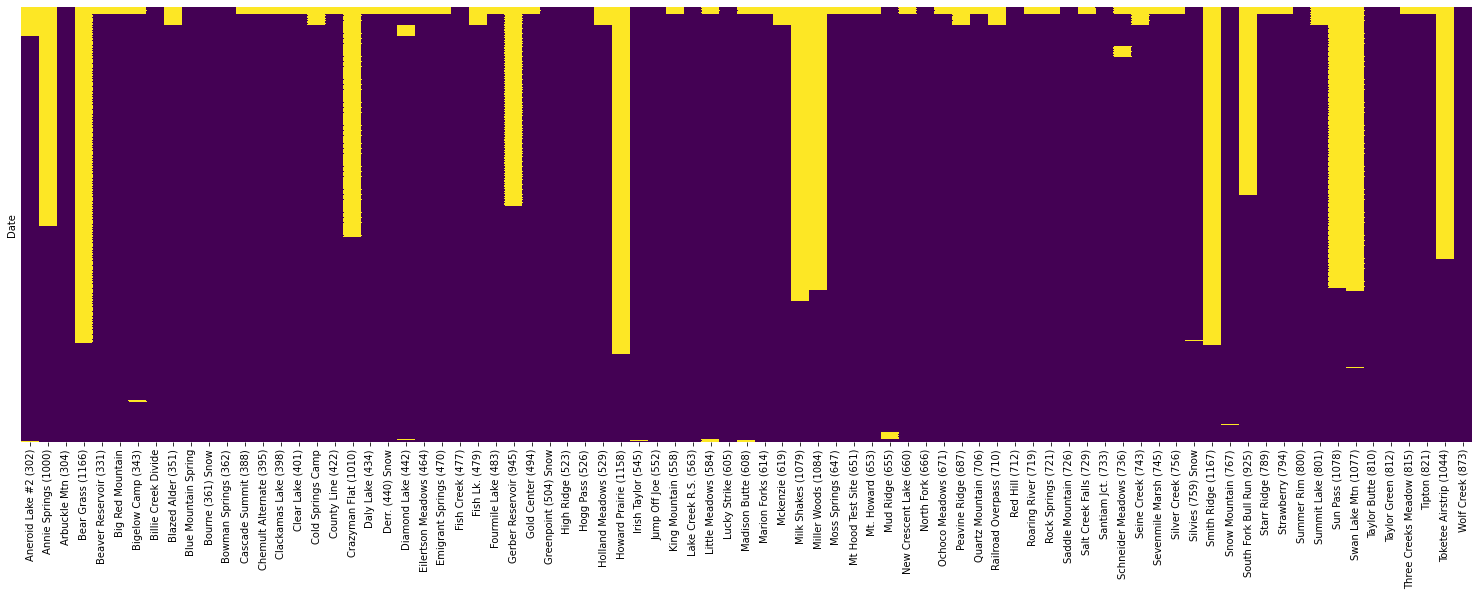

In [12]:
#Temp data
#Take a look at the missing values via a heatmap.  Yellow = nulls.
fig, ax = plt.subplots(1, figsize=(26,8))
sns.heatmap(OR_Sites.isnull(),yticklabels=False,cbar=False,cmap='viridis')

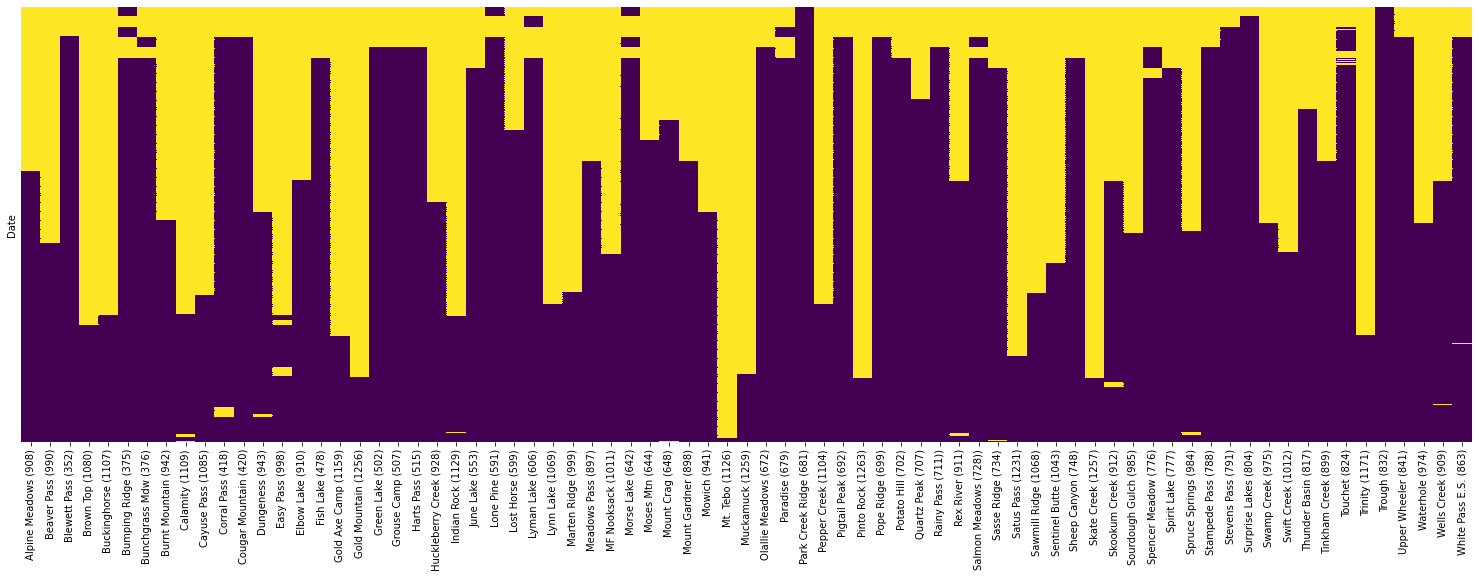

In [13]:
#Temp data
#Take a look at the missing values via a heatmap.  Yellow = nulls.
fig, ax = plt.subplots(1, figsize=(26,8))
sns.heatmap(WA_Sites.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
# import missingno as msno
# msno.matrix(WA_Sites)

In [15]:
!pip install sidetable
import sidetable
WA_Sites.stb.freq(['Alpine Meadows (908)'])

,Alpine Meadows (908),count,percent,cumulative_count,cumulative_percent
0,0.0,3584,37.458194,3584,37.458194
1,0.2,43,0.449415,3627,37.907609
2,0.1,40,0.418060,3667,38.325669
3,1.5,35,0.365803,3702,38.691472
4,0.3,33,0.344900,3735,39.036371
...,...,...,...,...,...
863,59.6,1,0.010452,9564,99.958194
864,53.2,1,0.010452,9565,99.968645
865,50.6,1,0.010452,9566,99.979097
866,45.5,1,0.010452,9567,99.989548


In [16]:
WA_Sites.stb.missing(['Alpine Meadows (908)'])

,missing,total,percent
Mt. Tebo (1126),15298,15413,99.253877
Pinto Rock (1263),13172,15413,85.460326
Skate Creek (1257),13170,15413,85.447350
Gold Mountain (1256),13149,15413,85.311101
Muckamuck (1259),13039,15413,84.597418
...,...,...,...
Bumping Ridge (375),1096,15413,7.110880
Blewett Pass (352),1065,15413,6.909752
Lone Pine (591),733,15413,4.755726
Stevens Pass (791),731,15413,4.742750


In [17]:
WA_Sites.stb.counts()

,count,unique,most_freq,most_freq_count,least_freq,least_freq_count
Mt. Tebo (1126),115,19,0.0,83,5.1,1
Mowich (941),8108,90,0.0,6109,8.6,1
Sourdough Gulch (985),7377,95,0.0,5502,10.0,1
Huckleberry Creek (928),8473,120,0.0,6126,7.1,1
Muckamuck (1259),2374,124,0.0,1493,9.8,1
...,...,...,...,...,...,...
Olallie Meadows (672),13950,902,0.0,4954,92.4,1
Lyman Lake (606),13953,921,0.0,4010,87.1,1
Swift Creek (1012),6693,976,0.0,2350,109.4,1
Easy Pass (998),3959,1069,0.0,1030,22.4,1


In [18]:
fig = go.Figure()

for i in WA_Sites.columns:
  WA = WA_Sites[WA_Sites[i] != 0].dropna()


  fig.add_trace(go.Box(y = WA[i], name = str(i)))

fig.update_layout(
    autosize=False,
    width=1600,
    height=800,
    margin=dict(l=20, r=20, t=2, b=8),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

In [19]:
import plotly.graph_objects as go

fig = go.Figure()

for i in OR_Sites.columns:
  OR = OR_Sites[OR_Sites[str(i)] != 0].dropna()


  fig.add_trace(go.Box(y = OR[i], name = str(i)))

fig.update_layout(
    autosize=False,
    width=1600,
    height=800,
    margin=dict(l=20, r=20, t=2, b=8),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

In [20]:
WA_Sites.describe()

,Alpine Meadows (908),Beaver Pass (990),Blewett Pass (352),Brown Top (1080),Buckinghorse (1107),Bumping Ridge (375),Bunchgrass Mdw (376),Burnt Mountain (942),Calamity (1109),Cayuse Pass (1085),Corral Pass (418),Cougar Mountain (420),Dungeness (943),Easy Pass (998),Elbow Lake (910),Fish Lake (478),Gold Axe Camp (1159),Gold Mountain (1256),Green Lake (502),Grouse Camp (507),Harts Pass (515),Huckleberry Creek (928),Indian Rock (1129),June Lake (553),Lone Pine (591),Lost Horse (599),Lyman Lake (606),Lynn Lake (1069),Marten Ridge (999),Meadows Pass (897),MF Nooksack (1011),Morse Lake (642),Moses Mtn (644),Mount Crag (648),Mount Gardner (898),Mowich (941),Mt. Tebo (1126),Muckamuck (1259),Olallie Meadows (672),Paradise (679),Park Creek Ridge (681),Pepper Creek (1104),Pigtail Peak (692),Pinto Rock (1263),Pope Ridge (699),Potato Hill (702),Quartz Peak (707),Rainy Pass (711)),Rex River (911),Salmon Meadows (728)),Sasse Ridge (734),Satus Pass (1231),Sawmill Ridge (1068),Sentinel Butte (1043),Sheep Canyon (748),Skate Creek (1257),Skookum Creek (912),Sourdough Gulch (985),Spencer Meadow (776),Spirit Lake (777),Spruce Springs (984),Stampede Pass (788),Stevens Pass (791),Surprise Lakes (804),Swamp Creek (975),Swift Creek (1012),Thunder Basin (817),Tinkham Creek (899),Touchet (824),Trinity (1171),Trough (832),Upper Wheeler (841),Waterhole (974),Wells Creek (909),White Pass E.S. (863)
count,9568.000000,7012.000000,14348.000000,4103.000000,4475.000000,14317.000000,13953.000000,7822.000000,4376.000000,5186.000000,13992.000000,14316.000000,7994.000000,3959.000000,9235.000000,13586.000000,3725.000000,2264.000000,13952.000000,13952.000000,13952.000000,8473.000000,4404.000000,13218.000000,14680.00000,11030.000000,13953.000000,4853.000000,5267.000000,9933.000000,6646.000000,14316.000000,10665.000000,11392.000000,9921.000000,8108.000000,115.000000,2374.000000,13950.000000,13952.000000,15413.000000,4865.000000,14317.000000,2241.000000,14315.000000,13585.000000,12126.000000,13952.000000,9095.000000,13952.000000,13205.000000,3032.00000,5252.000000,6316.000000,13583.000000,2243.000000,9060.000000,7377.000000,13587.000000,13216.000000,7356.000000,13952.000000,14682.000000,15043.000000,7736.000000,6693.000000,11759.00000,9934.000000,14276.000000,3768.000000,15413.000000,14313.000000,7743.000000,9178.000000,14292.000000
mean,19.383654,14.117613,4.158057,27.137022,21.744291,9.231319,9.935010,5.492585,1.102308,22.427092,13.868318,5.236805,2.761083,39.198762,12.020325,9.983247,2.852779,2.225883,8.189199,5.992015,17.755720,0.671993,7.835218,14.022545,14.15923,5.242339,25.300050,8.415743,21.545984,8.406957,23.727039,20.704443,4.673905,10.178248,4.613436,0.503268,1.129565,1.788332,19.579039,30.820721,15.617005,2.218767,21.482210,9.658768,5.206930,9.461870,6.543040,14.834461,11.191787,2.903190,10.852647,2.01128,13.175971,2.845234,13.300015,7.664155,10.491336,0.448855,9.933753,2.133800,3.855778,14.248072,13.002391,17.145337,5.101590,25.412177,10.88431,9.000242,10.063176,9.163907,3.227989,3.676141,14.586788,11.539627,7.685810
std,23.460777,16.183857,5.968230,26.630609,24.700433,11.642487,11.313102,8.563515,2.965907,24.906172,14.708125,8.295565,4.870160,38.611303,16.744094,12.446637,4.103709,3.594467,9.924819,7.842926,18.734632,1.682055,11.124304,19.569537,17.81325,7.509268,25.202785,12.653015,25.749265,12.169922,26.288811,22.674016,6.488623,13.237867,7.535503,1.356099,1.968701,2.909165,22.684140,30.540669,18.568764,4.869527,22.877251,13.497045,6.951442,11.764345,8.683055,16.205494,16.134079,4.097232,13.530607,3.48659,17.490129,3.883309,17.565662,10.653859,16.321867,1.435458,14.284742,4.724043,5.967938,17.292208,15.820722,20.288206,7.152139,29.508580,12.53456,12.053026,13.187792,12.089322,4.626211,4.923593,17.187358,14.250779,9.563567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,

In [22]:
OR_Sites.describe()

,Aneroid Lake #2 (302),Annie Springs (1000),Arbuckle Mtn (304),Bear Grass (1166),Beaver Reservoir (331),Big Red Mountain,Bigelow Camp (343),Billie Creek Divide,Blazed Alder (351),Blue Mountain Spring,Bourne (361) Snow,Bowman Springs (362),Cascade Summit (388),Chemult Alternate (395),Clackamas Lake (398),Clear Lake (401),Cold Springs Camp,County Line (422),Crazyman Flat (1010),Daly Lake (434),Derr. (440) Snow,Diamond Lake (442),Eilertson Meadows (464),Emigrant Springs (470),Fish Creek (477),Fish Lk. (479),Fourmile Lake (483),Gerber Reservoir (945),Gold Center (494),Greenpoint (504) Snow,High Ridge (523),Hogg Pass (526),Holland Meadows (529),Howard Prairie (1158),Irish Taylor (545),Jump Off Joe (552),King Mountain (558),Lake Creek R.S. (563),Little Meadows (584),Lucky Strike (605),...,Marion Forks (614),Mckenzie (619),Milk Shakes (1079),Miller Woods (1084),Moss Springs (647),Mt Hood Test Site (651),Mt. Howard (653),Mud Ridge (655),New Crescent Lake (660),North Fork (666),Ochoco Meadows (671),Peavine Ridge (687),Quartz Mountain (706),Railroad Overpass (710),Red Hill (712),Roaring River (719),Rock Springs (721),Saddle Mountain (726),Salt Creek Falls (729),Santiam Jct. (733),Schneider Meadows (736),Seine Creek (743),Sevenmile Marsh (745),Silver Creek (756),Silvies (759) Snow,Smith Ridge (1167),Snow Mountain (767),South Fork Bull Run (925),Starr Ridge (789),Strawberry (794),Summer Rim (800),Summit Lake (801),Sun Pass (1078),Swan Lake Mtn (1077),Taylor Butte (810),Taylor Green (812),Three Creeks Meadow (815),Tipton (821),Toketee Airstrip (1044),Wolf Creek (873)
count,13940.000000,7391.000000,14956.000000,3368.000000,14681.000000,14682.000000,14617.000000,14955.000000,14317.000000,14950.000000,14956.000000,14956.000000,14682.000000,14682.000000,14682.000000,14682.000000,14317.000000,14682.000000,7037.000000,14682.000000,14679.000000,14275.000000,14682.000000,14682.000000,14956.000000,14316.000000,14682.000000,8108.000000,14682.000000,14956.000000,14956.000000,14956.000000,14317.000000,2998.000000,14955.000000,14956.000000,14682.000000,14955.000000,14588.000000,14956.000000,...,14682.000000,14317.000000,4826.000000,5195.000000,14682.000000,14682.000000,14682.000000,14691.000000,14682.000000,14956.000000,14682.000000,14317.000000,14682.000000,14317.000000,14956.000000,14682.000000,14682.000000,14956.000000,14682.000000,14956.000000,14311.000000,14316.000000,14681.000000,14682.000000,14941.000000,3314.000000,14932.000000,8485.000000,14682.000000,14681.000000,14956.000000,14315.000000,5281.000000,5135.000000,14956.000000,14956.000000,14681.000000,14682.000000,6282.000000,14954.000000
mean,9.470861,13.491963,5.707455,13.258403,2.738138,9.058078,3.799843,6.439953,10.534986,4.817385,4.638072,2.066783,10.368165,2.157485,3.070222,3.580643,8.956869,0.956750,3.999758,4.302568,4.045603,4.065114,2.641575,1.433851,10.397974,2.980400,9.068049,0.332067,2.548924,4.867986,7.460504,10.870460,6.687546,1.113609,13.727182,3.127213,1.340955,2.862889,8.451069,2.130864,...,2.717048,14.717643,14.141691,0.011011,8.226754,23.489790,6.307969,8.292900,3.033579,6.021048,2.700817,3.676622,0.939450,0.128805,16.348596,9.211701,1.156450,1.564643,5.772531,4.229273,9.064007,0.387035,9.507070,2.662989,4.929442,1.197254,3.312235,1.622404,1.502323,1.238717,5.378952,15.739169,4.407366,6.381207,1.593187,5.968715,5.677536,3.573825,0.755030,4.774000
std,10.290978,16.492435,7.935238,18.112395,4.186305,12.090845,6.881622,9.155715,14.985399,6.701805,6.461878,3.385117,13.076054,3.729781,5.050827,5.729090,12.591741,1.852469,6.028386,8.361762,6.067807,6.722539,4.084340,2.948728,12.960559,4.853393,11.816926,0.819774,4.028157,7.730352,10.000858,14.692507,10.067380,2.311692,15.340735,5.870226,3.242912,4.618657,12.539574,3.505788,...,5.488874,17.840715,16.464127,0.130496,9.786303,25.367859,7.237097,11.271125,5.216105,10.208436,4.253242,6.195382,2.365277,0.556258,20.460637,12.704722,2.272285,4.131768,8.668786,7.346545,11.410196,1.344402,12.735913,4.574785,7.557087,3.039322,5.080677,4.3473

## Double Mass Analysis

In [65]:
def double_mass3(*args, month, time_freq, event_date):  #If you set month to a default, python sees it as a key-value argument which will break *args.
  

 #Compile and filter data with respect to double_mass3 function inputs:

  site_list = [ORWA_Sites[args[i]].dropna().resample(time_freq).sum() for i in range(0, len(args))] 
  df_merged = reduce(lambda left,right: pd.merge(left,right,left_index=True, right_index=True, how='outer'), site_list).dropna()
  df2 = df_merged.resample(time_freq).sum()
  
  if month == 0:
    df2 = df2
    # print(df2)
  

  # elif month > 0 or month < 12:

  #   filter1 = df2.index.month==month
  #   df2 = pd.DataFrame(np.array([df2[filter1]])#.reshape(len(filter1),3))
  #   # print(np.asarray(df2).shape)
  # #   # df3 = np.asarray(df2).reshape(690, 3)
  # #   # print(df3.shape)
  #   print(df2.shape)
  #   # print(df3)

  #   # print([df2[df2.index.month==month]])
  #   # x=pd.DataFrame(df2[0].cumsum())
  #   # x.columns = ['x']
  #   # print(x) 




  # elif month > 0 or month < 12:
  #   site_list1 = []
  #   for i in range(0, len(args)):
  #     site_list1.append(ORWA_Sites[args[i]].dropna())
      
  #   site_list2 = []
  #   for j in range(0, len(args)):
  #     site_list2.append(site_list1[j][site_list1[j].index.month==month])

  # elif month > 0 or month < 12:
  #   site_list1 = [ORWA_Sites[args[i]].dropna() for i in range(0, len(args))]     
  
  # else:
  #   print('select month (0-12)')

  
  x=pd.DataFrame(df2.iloc[:,0].cumsum())
  x.columns = ['x']
  y=pd.DataFrame(np.add.reduce([df2.iloc[:,i].cumsum() for i in range(0, len(args))]))
  y.index = x.index
  y.columns= ['y']

#Run t test stat analysis with specified event_date as the middle between the two datasets

  df = pd.DataFrame(df2.iloc[:,0][len(df2.iloc[:,0]) - 2*len(df2.iloc[:,0][df2.iloc[:,0].index > event_date]):len(df2.iloc[:,0])])
  df = np.split(df,2)

  ttest = stats.ttest_ind(df[0], df[1])
  statistic = ttest[0]
  pvalue = ttest[1]
  print('Null hypothesis(H0: μ1=μ2). Alternative hypothesis(H1: μ1!=μ2.)')
  print('Calculated t test statistic: {:.2f}.  Calculated p value: {:.2f}'.format(statistic[0], pvalue[0]))
  if pvalue < 0.05:
    print('The p value obtained from T-test analysis is significant (p value < 0.05), and therefore, we reject the H0 as there is a significant difference between means.')
  else:
    print('The p value obtained from T-test analysis is not significant (p value > 0.05), and therefore, we fail to reject the H0 as there is not a significant difference between means.')

#Plot the data

  customdata_list = [df2.iloc[:,0], x, y]
  customdata = reduce(lambda left,right: pd.merge(left,right,left_index=True, right_index=True, how='outer'), customdata_list)
  customdata.reset_index(inplace=True)

  fig = go.Figure()
  
  fig.add_trace(go.Scatter(
      x=x.iloc[:,0],
      y=y.iloc[:,0],
      mode='lines',
      customdata=customdata,
      hovertemplate = '<b>Date: %{customdata[0]}</b><br>Site of Interest - Cumulative SWE (in): %{customdata[2]:.2f}</br>Comparison Site(s) - Cumulative SWE (in): %{customdata[3]:.2f}<br>Site of Interest - SWE (in): %{customdata[1]:.2f}</br>',
      name = 'Site of interest: {}'.format(df2.columns[0])
  ))

  fig.add_trace(go.Scatter(
      x=x.iloc[:,0][x.index==event_date],
      y=y.iloc[:,0][y.index==event_date],
      mode='markers',
      name='Date of event: {}'.format(event_date)

  ))
  # comparison_sites_list = list(args)
  fig.update_layout(
   height=900,
   width=900,
   title={
        'text': 'SWE Double Mass Curve',
        'y':.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Cumulative SWE at site of interest (%s)" % (df2.columns[0]),
    yaxis_title="Total Cumulative SWE of all Comparison Sites {}".format(args[1::]),

    xaxis2=dict(title='Date',
                overlaying='y',
                side='right')   
  )

  fig.show()


## Double Mass Analysis for various sites

### Fire: site burned entirely

In [66]:
double_mass3('Corral Pass (418)', 'Huckleberry Creek (928)', 'Morse Lake (642)', month=2, time_freq = 'W', event_date='2017-10-05')

Null hypothesis(H0: μ1=μ2). Alternative hypothesis(H1: μ1!=μ2.)
Calculated t test statistic: 0.62.  Calculated p value: 0.54
The p value obtained from T-test analysis is not significant (p value > 0.05), and therefore, we fail to reject the H0 as there is not a significant difference between means.


In [67]:
double_mass3('Diamond Lake (442)', 'Summit Lake (801)', month=0, time_freq = 'M', event_date='2017-06-26')  #'Annie Springs (1000)'

Null hypothesis(H0: μ1=μ2). Alternative hypothesis(H1: μ1!=μ2.)
Calculated t test statistic: 0.89.  Calculated p value: 0.38
The p value obtained from T-test analysis is not significant (p value > 0.05), and therefore, we fail to reject the H0 as there is not a significant difference between means.


### Fire nearby, but site remained intact

In [73]:
double_mass3('Moses Mtn (644)', 'Sentinel Butte (1043)', month=0, time_freq = 'W', event_date='03-15-2015')

Null hypothesis(H0: μ1=μ2). Alternative hypothesis(H1: μ1!=μ2.)
Calculated t test statistic: 1.10.  Calculated p value: 0.27
The p value obtained from T-test analysis is not significant (p value > 0.05), and therefore, we fail to reject the H0 as there is not a significant difference between means.


In [69]:
double_mass3('Sasse Ridge (734)', 'Fish Lake (478)','Olallie Meadows (672)','Stampede Pass (788)', month=0, time_freq = 'W', event_date='06-05-2016')

Null hypothesis(H0: μ1=μ2). Alternative hypothesis(H1: μ1!=μ2.)
Calculated t test statistic: 2.48.  Calculated p value: 0.01
The p value obtained from T-test analysis is significant (p value < 0.05), and therefore, we reject the H0 as there is a significant difference between means.


In [71]:
double_mass3('Sentinel Butte (1043)', 'Moses Mtn (644)',month=0, time_freq = 'W', event_date='04-16-2017') #, 'Bunchgrass Mdw (376)'

Null hypothesis(H0: μ1=μ2). Alternative hypothesis(H1: μ1!=μ2.)
Calculated t test statistic: 0.14.  Calculated p value: 0.89
The p value obtained from T-test analysis is not significant (p value > 0.05), and therefore, we fail to reject the H0 as there is not a significant difference between means.


In [77]:
double_mass3('Mckenzie (619)', 'Bear Grass (1166)', 'Hogg Pass (526)', month=0, time_freq = 'W', event_date='05-06-2018') #, 'Bunchgrass Mdw (376)'

Null hypothesis(H0: μ1=μ2). Alternative hypothesis(H1: μ1!=μ2.)
Calculated t test statistic: 3.00.  Calculated p value: 0.00
The p value obtained from T-test analysis is significant (p value < 0.05), and therefore, we reject the H0 as there is a significant difference between means.


### Pillow Alterations

In [76]:
double_mass3('Roaring River (719)', 'Irish Taylor (545)', 'Cascade Summit (388)', month=0, time_freq='W', event_date='2019-04-28')

Null hypothesis(H0: μ1=μ2). Alternative hypothesis(H1: μ1!=μ2.)
Calculated t test statistic: 1.65.  Calculated p value: 0.10
The p value obtained from T-test analysis is not significant (p value > 0.05), and therefore, we fail to reject the H0 as there is not a significant difference between means.


In [78]:
double_mass3('Railroad Overpass (710)', 'Salt Creek Falls (729)', month=0, time_freq='W', event_date='2018-06-01')  #'Holland Meadows (529)', 'Cascade Summit (388)'

Null hypothesis(H0: μ1=μ2). Alternative hypothesis(H1: μ1!=μ2.)
Calculated t test statistic: 0.26.  Calculated p value: 0.79
The p value obtained from T-test analysis is not significant (p value > 0.05), and therefore, we fail to reject the H0 as there is not a significant difference between means.


In [80]:
double_mass3('Mud Ridge (655)', 'Clear Lake (401)','Red Hill (712)', time_freq='W', month=0,event_date='2017-06-01' ) #'Clackamas Lake (398)', 'Mt Hood Test Site (651)'

Null hypothesis(H0: μ1=μ2). Alternative hypothesis(H1: μ1!=μ2.)
Calculated t test statistic: 2.87.  Calculated p value: 0.00
The p value obtained from T-test analysis is significant (p value < 0.05), and therefore, we reject the H0 as there is a significant difference between means.


In [38]:
OR_Sites.columns

Index(['Aneroid Lake #2 (302)', 'Annie Springs (1000)', 'Arbuckle Mtn (304)',
       'Bear Grass (1166)', 'Beaver Reservoir (331)', 'Big Red Mountain',
       'Bigelow Camp (343)', 'Billie Creek Divide', 'Blazed Alder (351)',
       'Blue Mountain Spring', 'Bourne (361) Snow', 'Bowman Springs (362)',
       'Cascade Summit (388)', 'Chemult Alternate (395)',
       'Clackamas Lake (398)', 'Clear Lake (401)', 'Cold Springs Camp',
       'County Line (422)', 'Crazyman Flat (1010)', 'Daly Lake (434)',
       'Derr. (440) Snow', 'Diamond Lake (442)', 'Eilertson Meadows (464)',
       'Emigrant Springs (470)', 'Fish Creek (477)', 'Fish Lk. (479)',
       'Fourmile Lake (483)', 'Gerber Reservoir (945)', 'Gold Center (494)',
       'Greenpoint (504) Snow', 'High Ridge (523)', 'Hogg Pass (526)',
       'Holland Meadows (529)', 'Howard Prairie (1158)', 'Irish Taylor (545)',
       'Jump Off Joe (552)', 'King Mountain (558)', 'Lake Creek R.S. (563)',
       'Little Meadows (584)', 'Lucky Strike (

## Boiler plate code

#### Prep'ing data for statistical tests

16.923788135973332 4.1356038837454366e-05
nan nan
count    651.000000
mean       3.875730
std        5.834064
min        0.000000
25%        0.000000
50%        0.000000
75%        6.000000
max       20.600000
Name: Moses Mtn (644), dtype: float64
count    651.000000
mean       2.743318
std        3.910439
min        0.000000
25%        0.000000
50%        0.000000
75%        5.700000
max       11.700000
Name: Moses Mtn (644), dtype: float64


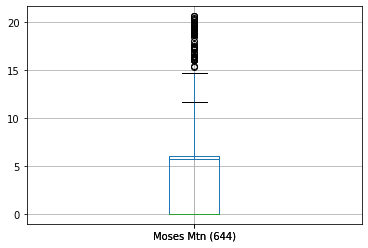

In [ ]:
# site_list2 = []
#     for i in range(0, len(site_list)):
#       site_list2.append(ORWA_Sites[site_list[i]].dropna())

event_date = '2019-03-01'

site_list = ('Moses Mtn (644)', 'Sentinel Butte (1043)','Annie Springs (1000)')
site_list2 = []
for i in range(0, len(site_list)):
  site_list2.append(ORWA_Sites[site_list[i]].dropna())

# site_list2
x=site_list2[0]
y=(np.add.reduce(site_list2))
x1=site_list2[0].cumsum()
y1=(np.add.reduce(site_list2)).cumsum()

df = x[len(x) - 2*len(x[x.index > event_date]):len(x)]
df1 = y[len(y) - 2*len(y[y.index > event_date]):len(y)]

df = np.split(df,2)
df1 = np.split(df1,2)

fvalue, pvalue = stats.f_oneway(df[0], df[1])
fvalue1, pvalue1 = stats.f_oneway(df1[0], df1[1])
print(fvalue, pvalue)
print(fvalue1, pvalue1)
print(df[0].describe())
pd.DataFrame(df[0]).boxplot()
print(df[1].describe())
pd.DataFrame(df[1]).boxplot()

#### Reducing for year and month scales

In [ ]:
def double_mass(*args, month, scale):  #If you set month to a default, python sees it as a key-value argument which won't make *args work.
  
  if scale = year:
    np.reduce



  site_list = args

  if month == 0:
    site_list2 = []
    for i in range(0, len(site_list)):
      site_list2.append(ORWA_Sites[site_list[i]].dropna())

  elif month > 0 or month < 12:
    site_list1 = []
    for i in range(0, len(site_list)):
      site_list1.append(ORWA_Sites[site_list[i]].dropna())
      
    site_list2 = []
    for j in range(0, len(site_list)):
      site_list2.append(site_list1[j][site_list1[j].index.month==month])
  
  else:
    print('select month (1-12)')


  x=site_list2[0].cumsum()
  y=(np.add.reduce(site_list2)).cumsum()

  # res = sm.OLS(y, x).fit().fittedvalues
  # print(res)

  customdata = pd.DataFrame(zip(site_list2[0].reset_index()['Date'], x, y)) #Can also use np.c_
  
    
  fig = go.Figure()
  
  fig.add_trace(go.Scatter(
      x=x,
      y=y,
      mode='lines',
      customdata=customdata,
      hovertemplate = 'Date: <b>%{customdata[0]}</b><br> x-Axis Accumulative SWE (in): %{customdata[1]}</br><br> y-Axis Accumulative SWE (in): %{customdata[2]}</br>',
      name = 'Site of interest: {}'.format(site_list2[0].name)
  ))

  fig.update_layout(
   height=900,
   width=900,
   title={
        'text': 'SWE Double Mass Analysis',
        'y':.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Accumulative SWE at site of interest (%s)" % (site_list2[0].name),
    yaxis_title="Total Accumulative SWE of all Comparison Sites %s" % ([site_list2[i].name for i in range(0, len(site_list2))]),
        
        
        # site_list2[i].name, site_list2[2].name),
    xaxis2=dict(title='Date',
                overlaying='y',
                side='right')   
  )

  fig.show()
  # print(site for site.name in site_list2)


In [ ]:
print(x[x.index==event_date])
print(y[y.index==event_date])

Date
2019-03-01    9.1
Name: Moses Mtn (644), dtype: float64
Date
2019-03-01    55.9
dtype: float64


In [ ]:
len(x1)

10665

In [ ]:
len(x[x.index>event_date])

651

In [ ]:
df = ORWA_Sites['Moses Mtn (644)'].iloc[:-3].dropna()


In [ ]:
df

Date
1991-10-01    0.0
1991-10-02    0.0
1991-10-03    0.0
1991-10-04    0.0
1991-10-05    0.0
             ... 
2020-12-04    3.2
2020-12-05    3.2
2020-12-06    3.2
2020-12-07    3.2
2020-12-08    3.2
Name: Moses Mtn (644), Length: 10662, dtype: float64

In [ ]:
len(df)

10662

In [ ]:
a = np.split(df, 2)

In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(a[0], a[1])
print(fvalue, pvalue) #can't use cumulative in actual analysis as there will be obvious significant differences.

63.66289341281693 1.6278070798272638e-15


In [ ]:
# from statsmodels.stats.multicomp import pairwise_tukeyhsd

# # perform multiple pairwise comparison (Tukey HSD)
# m_comp = pairwise_tukeyhsd(endog=a[1], groups=a[0], alpha=0.05)
# print(m_comp)

In [ ]:
# def bla(date, station of interest, comparison stations):

#   run corr bw x and y before date and after the date

#   run anova for x before the date and after the date
